## Bike Sharing (Capital Bikesharing)


[Sumber data](https://drive.google.com/drive/folders/17Mw_4wSRiBB5vLLQJN137AlAbyB3CLFx)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

**Capital Bikeshare** merupakan suatu sistem sewa sepeda yang beroperasi di Amerika Serikat. Sistem ini mewakili evolusi baru dari penyewaan sepeda konvensional, di mana proses keanggotaan, peminjaman, dan pengembalian sepeda telah diotomatisasi sepenuhnya. Melalui platform ini, pengguna dapat dengan mudah menyewa sepeda dari satu lokasi dan mengembalikannya di lokasi lain. Saat ini, lebih dari 500 program bike-sharing tersebar di seluruh dunia, dengan total lebih dari 500.000 sepeda yang tersedia. **Capital Bikeshare** sendiri menyediakan lebih dari 600 stasiun dan sekitar 5.000 sepeda [Capital Bikeshare](https://capitalbikeshare.com/) di seluruh wilayah Washington. Sistem ini memiliki dampak penting dalam mengatasi permasalahan lalu lintas, lingkungan, dan kesehatan, menjadikan minat terhadapnya semakin meningkat.

Namun demikian, aspek menarik dari sistem ini terletak pada data yang dihasilkannya. Berbeda dengan moda transportasi lain seperti bus atau subway, sistem ini mencatat secara rinci tentang durasi perjalanan, lokasi awal, dan tujuan perjalanan. Fitur ini menjadikan sistem sewa sepeda sebagai suatu jaringan sensor virtual yang memiliki potensi dalam memahami mobilitas kota. Dengan demikian, data ini diharapkan mampu mendeteksi berbagai peristiwa penting di lingkungan kota melalui pemantauan yang teliti.

**Pernyataan Masalah**

Salah satu tantangan utama dalam pengelolaan sistem peminjaman ini adalah **mengatur jumlah sepeda yang tersedia agar selalu sesuai dengan berbagai kondisi dan situasi. Keberhasilan dalam memenuhi permintaan pengguna sistem peminjaman sepeda merupakan hal yang vital, sementara kegagalan dapat mengakibatkan penurunan kepercayaan dari pelanggan**. Namun, jika jumlah sepeda terlalu banyak, dapat berakibat pada adanya sepeda yang tidak terpakai, yang pada akhirnya akan menjadi tidak efisien. Hal ini dapat mengakibatkan peningkatan biaya untuk manajemen, logistik, dan perawatan sepeda.

**Tujuan**

Berdasarkan tantangan yang dihadapi, Capital Bikeshare perlu memiliki alat yang efektif untuk meramalkan dan memberikan dukungan kepada semua pihak yang terlibat (baik pelanggan maupun Capital Bikeshare itu sendiri) agar dapat **mengestimasi jumlah sepeda yang harus tersedia secara akurat dalam berbagai kondisi dan situasi**. Faktor-faktor seperti cuaca, musim, kelembaban, dan suhu dapat mempengaruhi akurasi perkiraan jumlah sepeda yang dibutuhkan. Hal ini memiliki dampak positif tidak hanya dalam mendapatkan keuntungan, tetapi juga dalam menjaga efisiensi biaya operasional dari perspektif Capital Bikeshare. Dari sudut pandang pengguna (pelanggan), hal ini juga akan memastikan bahwa kebutuhan mereka terpenuhi dengan baik.

**Pendekatan Analitik**

Saya akan melakukan analisis data untuk mengidentifikasi pola dalam fitur-fitur yang ada, yang membedakan kondisi satu dengan yang lain, serta bagaimana setiap fitur tersebut memengaruhi kebutuhan jumlah unit sepeda. Selanjutnya, saya akan mengembangkan model regresi yang akan membantu menentukan jumlah unit sepeda yang harus disediakan oleh Capital Bikeshare, bertujuan untuk menjaga efisiensi biaya operasional.

**Evaluasi Metrik**

Saya akan menggunakan metrik evaluasi berikut: MAE, MAPE, dan R-squared. MAE mewakili rata-rata nilai absolut dari kesalahan prediksi, sedangkan MAPE mencerminkan rata-rata persentase kesalahan yang dihasilkan oleh model regresi. Semakin kecil nilai MAE dan MAPE yang dihasilkan, semakin akurat model dalam memprediksi jumlah unit sepeda dengan mempertimbangkan fitur-fitur yang digunakan. Selain itu, jika model akhir yang dipilih adalah model linear, saya juga akan menggunakan nilai R-squared. Nilai R-squared membantu dalam mengevaluasi sejauh mana model mampu menjelaskan variasi data dan seberapa besar pengaruh variabel independen terhadap variabel dependen. Semakin mendekati 1, semakin baik model tersebut dalam menggambarkan data observasi. Namun, penting untuk dicatat bahwa metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Dataset ini berisi data tentang peminjaman sepeda dalam sistem ***Capital Bikeshare*** selama rentang waktu tahun 2011 hingga 2012.
- Setiap baris dalam dataset mewakili informasi terkait waktu peminjaman, kondisi cuaca, dan musim yang berkaitan.

**Informasi Atribut**

| **Atribut** | **Tipe Data** | **Deskripsi** |
| --- | --- | --- |
| dteday | Objek | Tanggal |
| hum | Float | Kelembaban yang dinormalisasi (nilai dibagi 100)|
| weathersit | Integer | 1: Cerah, Beberapa awan, Sebagian berawan, Sebagian berawan<br> 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Beberapa awan, Kabut<br> 3: Salju Ringan, Hujan Ringan + Badai petir + Awan berserak, Hujan Ringan + Awan berserak<br> 4: Hujan Lebat + Butiran es + Badai petir + Kabut, Salju + Kabut |
| holiday | Integer | 0: Bukan hari libur<br> 1: Hari libur |
| season | Integer | 1: Musim dingin<br> 2: Musim semi<br> 3: Musim panas<br> 4: Musim gugur |
| atemp | Float | Suhu "terasa seperti" dalam Celsius |
| temp | Float | Suhu yang dinormalisasi dalam Celsius |
| hr | Integer | Jam (0 hingga 23) |
| casual | Integer | Jumlah pengguna sewa kasual |
| registered | Integer | Jumlah pengguna terdaftar |
| cnt | Integer | Jumlah total sepeda yang dipinjamkan, termasuk pengguna kasual dan terdaftar|

In [ ]:
# Mengimpor library yang diperlukan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


**Load Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_bike_sharing.csv to data_bike_sharing.csv


In [ ]:
# Load dataset
df = pd.read_csv('/content/data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


### **Data Preprocessing**

Pada tahap ini, saya akan melakukan proses pembersihan data agar data yang sudah bersih dapat digunakan untuk analisis lebih lanjut. Berikut adalah langkah-langkah yang akan saya lakukan:

1. Menyesuaikan Nama Kolom dan Nilai:
   Saya akan memastikan bahwa nama kolom dan nilai-nilai dalam dataset mudah dibaca dan dimengerti.

2. Mengubah Tipe Data Fitur:
   Saya akan mengubah tipe data beberapa fitur agar sesuai dengan nilai yang dimilikinya.

3. Deteksi Missing Value dan Duplikasi:
   Saya akan melakukan pengecekan terhadap nilai yang hilang (missing value) dan data duplikat dalam dataset.

4. Menghapus Fitur yang Tidak Relevan:
   Saya akan menghapus fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.

5. Analisis Korelasi:
   Saya akan menganalisis korelasi antara fitur-fitur dalam dataset untuk memahami hubungan di antara mereka.

6. Deteksi Outlier pada Data Numerik:
   Saya akan melakukan pengecekan terhadap adanya outlier pada data numerik dalam dataset.

Semua langkah di atas bertujuan untuk membersihkan dataset sehingga dapat memberikan hasil analisis yang lebih akurat dan bermakna.

In [ ]:
# Membuat duplikat Dataframe
df_model = df.copy()

In [ ]:
df_model.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


**Penyesuaian Nama Kolom dan Value**

In [ ]:
# Mengurutkan dataset berdasarkan Tanggal dan Jam
df_model = df_model.sort_values(['dteday', 'hr']).reset_index()
df_model.drop('index', axis=1, inplace=True)

In [ ]:
# Mengubah value kolom 'season' dan 'weathersit' dari numerik menjadi penamaan kategori yang sesuai
df_model['season'] = df_model['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
df_model['weathersit'] = df_model['weathersit'].replace({1:'clear', 2:'cloudy', 3:'Light snow/Light rain', 4:'Heavy rain/Snow'})

In [ ]:
# Mengubah beberapa nama kolom
df_model = df_model.rename(columns={'weathersit':'weather',
                       'dteday':'date',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df_model.head()

,date,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count
0,2011-01-01,0.81,clear,0,winter,0.2879,0.24,0,3,13,16
1,2011-01-01,0.80,clear,0,winter,0.2727,0.22,1,8,32,40
2,2011-01-01,0.80,clear,0,winter,0.2727,0.22,2,5,27,32
3,2011-01-01,0.75,clear,0,winter,0.2879,0.24,3,3,10,13
4,2011-01-01,0.75,clear,0,winter,0.2879,0.24,4,0,1,1


**Mengubah Tipe Data dan Memisahkan Data Kolom 'date'**

In [ ]:
# Mengubah tipe data 'date' menjadi DateTime
df_model['date'] = df_model['date'].astype('datetime64')

# Membuat kolom untuk memisahkan data Tahun, Bulan, dan Hari
df_model['year'] = df_model['date'].dt.year
df_model['month'] = df_model['date'].dt.month
df_model['day'] = df_model['date'].dt.day_name()

In [ ]:
# Mengubah tipe data feature 'holiday', 'year', dan 'month' menjadi category
df_model['holiday'] = df_model['holiday'].astype('category')
df_model['year'] = df_model['year'].astype('category')
df_model['month'] = df_model['month'].astype('category')

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        12165 non-null  datetime64[ns]
 1   humidity    12165 non-null  float64       
 2   weather     12165 non-null  object        
 3   holiday     12165 non-null  category      
 4   season      12165 non-null  object        
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hour        12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  count       12165 non-null  int64         
 11  year        12165 non-null  category      
 12  month       12165 non-null  category      
 13  day         12165 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 1.1+ MB



**Pengecekan Nilai Hilang dan Data Duplikat**

In [ ]:
df_model.duplicated().any()

False

In [ ]:
# Cek info lebih detail untuk setiap feature
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,date,datetime64[ns],0,0.0,731,"[2012-07-31T00:00:00.000000000, 2012-03-10T00:..."
1,humidity,float64,0,0.0,89,"[0.37, 0.57]"
2,weather,object,0,0.0,4,"[Heavy rain/Snow, Light snow/Light rain]"
3,holiday,category,0,0.0,2,"[0, 1]"
4,season,object,0,0.0,4,"[spring, winter]"
5,atemp,float64,0,0.0,65,"[0.3485, 0.1364]"
6,temp,float64,0,0.0,50,"[0.24, 0.32]"
7,hour,int64,0,0.0,24,"[13, 0]"
8,casual,int64,0,0.0,305,"[19, 81]"
9,registered,int64,0,0.0,742,"[398, 55]"


Dari informasi dataset di atas, dapat disimpulkan bahwa tidak ada nilai yang hilang (missing value) dalam dataset.

**Drop Column (Feature Selection)**

Tentu, sebelum menghapus kolom atau fitur tertentu, perlu mempertimbangkan beberapa faktor. Dalam tahap awal, kita dapat menggunakan pengetahuan domain untuk memutuskan fitur mana yang mungkin tidak relevan.<br>
- Jika berdasarkan pengetahuan domain, fitur `Casual` dan `Registered` mungkin tidak relevan untuk analisis prediktif. Fokus analisis prediktif adalah pada total jumlah unit sepeda yang disewa, tanpa memperhitungkan status pengguna.
- Kolom `date` juga bisa dihilangkan karena informasi yang terkandung di dalamnya sudah diwakili oleh kolom `year`, `month`, dan `day`.

In [ ]:
# Drop kolom (feature) yang tidak diperlukan
df_model.drop(columns=['date', 'casual', 'registered'], inplace=True)

**Data Correlation**

Text(0.5, 1.0, 'Correlation Matrix')

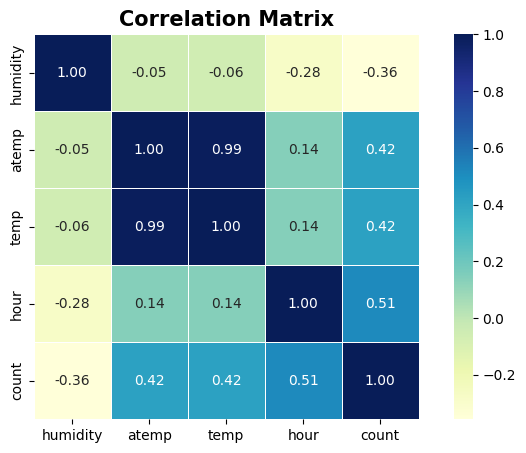

In [ ]:
# Correlation matrix
plt.figure(figsize=(9, 5))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
calc_vif(df_model[['humidity', 'atemp', 'temp', 'hour', 'count']])

,variables,VIF
0,humidity,6.047913
1,atemp,338.317799
2,temp,306.108156
3,hour,3.849810
4,count,3.063218


Matriks korelasi di atas menunjukkan adanya beberapa fitur yang memiliki korelasi dengan `count`, walaupun korelasinya tidak terlalu kuat. Korelasi positif tertinggi terdapat pada fitur `temp`, `atemp`, dan `hour`. Sebaliknya, korelasi negatif tertinggi terdapat pada fitur `humidity`. Ini berarti semakin tinggi tingkat kelembapan (humidity), jumlah penyewaan sepeda cenderung lebih sedikit.

Namun, perlu diberikan perhatian lebih lanjut terhadap korelasi antara kolom `temp` dan `atemp`, yang memiliki korelasi sangat tinggi (0.99). Ini menunjukkan adanya multikolinearitas antara kedua kolom tersebut. Indikasi ini juga diperkuat oleh skor VIF yang sangat tinggi (338 dan 306), sementara batas nilai VIF yang mengindikasikan multikolinearitas adalah di atas 4. Oleh karena itu, kami akan menghapus salah satu dari kedua kolom tersebut, yaitu `temp`. Keputusan ini didasarkan pada pengetahuan domain, di mana `temp` berisi nilai suhu yang terukur oleh termometer, sementara `atemp` mencakup nilai suhu yang memperhitungkan faktor-faktor seperti suhu udara, kelembapan, dan kecepatan angin [(sumber MetOffice)](https://blog.metoffice.gov.uk/2012/02/15/what-is-feels-like-temperature/).

In [ ]:
# Drop kolom 'atemp'
df_model = df_model.drop('temp', axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

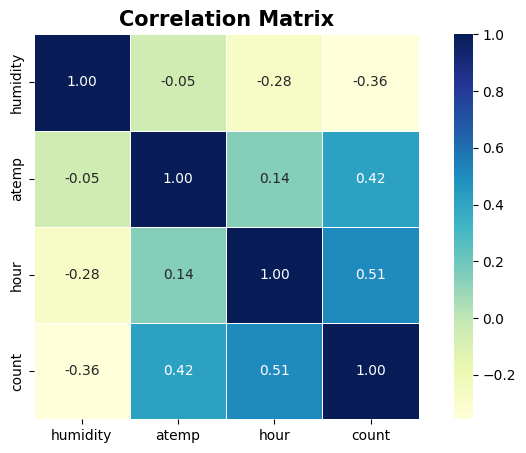

In [ ]:
plt.figure(figsize=(9, 5))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

In [ ]:
calc_vif(df_model[['humidity', 'atemp', 'hour', 'count']])

,variables,VIF
0,humidity,5.571588
1,atemp,8.360153
2,hour,3.837270
3,count,3.063059


Setelah menghapus kolom `temp`, terlihat bahwa skor VIF mengalami penurunan yang cukup besar untuk kolom `atemp`, menjadi 8.3. Meskipun skor VIF untuk kolom `humidity` dan `atemp` masih melebihi 4, kami akan tetap mempertahankan kedua fitur tersebut karena keduanya memiliki dampak yang signifikan dalam menentukan jumlah unit sepeda yang perlu disediakan berdasarkan kondisi dan situasi.

**Checking Outliers**

Adanya pencilan (*outliers*) dalam data dapat memengaruhi hasil analisis dan pemodelan yang dilakukan. Sebelum mengambil keputusan mengenai cara mengatasi pencilan, terdapat beberapa aspek yang perlu diperhatikan, salah satunya adalah mempertimbangkan pengetahuan di bidang yang bersangkutan (*domain knowledge*).

In [ ]:
# Mengecek informasi statistik deskriptif data numerik
df_model.describe().select_dtypes(['float','int'])

,humidity,atemp,hour,count
count,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.476996,11.519770,189.271023
std,0.192102,0.171857,6.931872,181.223903
min,0.000000,0.000000,0.000000,1.000000
25%,0.470000,0.333300,6.000000,40.000000
50%,0.620000,0.484800,12.000000,142.000000
75%,0.780000,0.621200,18.000000,282.000000
max,1.000000,1.000000,23.000000,970.000000


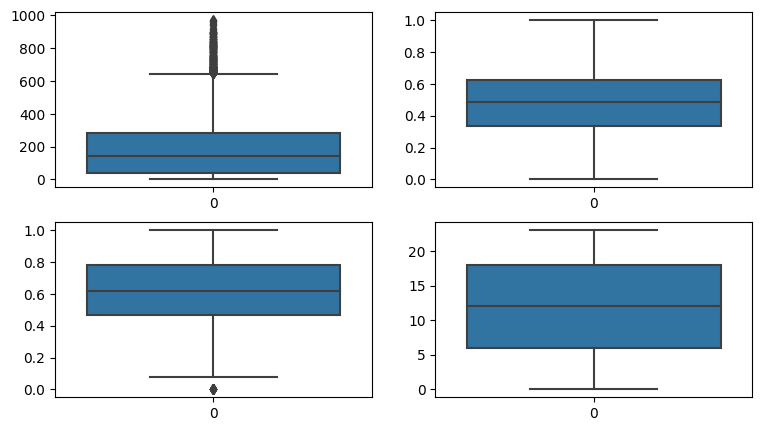

In [ ]:
# Plot boxplot untuk mengecek outliers
fig, axes = plt.subplots(2,2, figsize=(9,5))
sns.boxplot(df_model['count'], ax=axes[0][0])
sns.boxplot(df_model['atemp'], ax=axes[0][1])
sns.boxplot(df_model['humidity'], ax=axes[1][0])
sns.boxplot(df_model['hour'], ax=axes[1][1])
plt.show()

Dari visualisasi *boxplot* yang telah ditampilkan diatas, terlihat adanya banyak pencilan (*outliers*) pada fitur `count` dan beberapa di fitur `humidity`. Karena itu, langkah selanjutnya adalah melakukan penyelidikan lebih lanjut terhadap outliers tersebut. Untuk membuat dataset yang lebih terbebas dari outliers, rencananya saya akan menerapkan beberapa teknik pengolahan data yang memadukan metode IQR (*Interquartile Range*) dengan pengetahuan di bidang yang bersangkutan (*domain knowledge*).

**Humidity**

In [ ]:
df_model[df_model['humidity']==0]

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
1094,0.0,Light snow/Light rain,0,winter,0.3182,0,3,2011,3,Thursday
1095,0.0,Light snow/Light rain,0,winter,0.3182,1,2,2011,3,Thursday
1096,0.0,Light snow/Light rain,0,winter,0.3333,6,12,2011,3,Thursday
1097,0.0,Light snow/Light rain,0,winter,0.3939,7,37,2011,3,Thursday
1098,0.0,Light snow/Light rain,0,winter,0.3939,8,44,2011,3,Thursday
1099,0.0,Light snow/Light rain,0,winter,0.4091,9,24,2011,3,Thursday
1100,0.0,Light snow/Light rain,0,winter,0.4091,11,11,2011,3,Thursday
1101,0.0,Light snow/Light rain,0,winter,0.4242,12,34,2011,3,Thursday
1102,0.0,Light snow/Light rain,0,winter,0.4242,13,12,2011,3,Thursday
1103,0.0,Light snow/Light rain,0,winter,0.4394,15,14,2011,3,Thursday


Berdasarkan informasi yang disajikan, terdeteksi bahwa terdapat 14 baris data yang memiliki nilai kelembapan (*humidity*) sebesar 0. Namun, menurut sumber yang disebutkan dari [WGNTV](https://wgntv.com/weather/can-the-relative-humidity-ever-be-zero-percent/#:~:text=The%20concept%20of%20zero%20percent,if%20only%20in%20trace%20amounts), nilai kelembapan yang benar-benar 0 adalah hal yang tidak mungkin terjadi dan biasanya ada setidaknya jumlah yang sangat kecil. Oleh karena itu, keputusan yang diambil adalah menghapus data-data tersebut yang memiliki nilai kelembapan 0.

In [ ]:
# Drop feature 'humidity' yang memiliki nilai 0
df_model = df_model[df_model['humidity']!=0]

**Count**

In [ ]:
# Mengecek outliers pada feature 'count'

q1 = df_model['count'].quantile(0.25)
q3 = df_model['count'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5
print(f'IQR: {iqr}')

limit_bawah = q1 - limit
limit_atas = q3 + limit
print(f'limit_bawah: {limit_bawah}')
print(f'limit_atas: {limit_atas}')

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [ ]:
# Cek deskriptif statistik kolom count
df_model['count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64

In [ ]:
# Cek count > 645
df_model[df_model['count']>645]

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
3942,0.30,clear,0,summer,0.6515,14,651,2011,8,Tuesday
7292,0.43,cloudy,0,winter,0.6212,18,712,2012,3,Monday
7309,0.37,clear,0,winter,0.6364,17,676,2012,3,Tuesday
7310,0.34,clear,0,winter,0.6364,18,734,2012,3,Tuesday
7325,0.28,clear,0,winter,0.6364,17,782,2012,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...
11748,0.51,clear,0,fall,0.2121,8,659,2012,12,Thursday
11818,0.61,cloudy,0,fall,0.3030,8,724,2012,12,Tuesday
11832,0.65,cloudy,0,fall,0.2576,8,688,2012,12,Wednesday
11853,0.60,clear,0,fall,0.2273,8,679,2012,12,Thursday


Dari informasi yang disajikan, terlihat bahwa 75% data pada kolom `count` memiliki jumlah penyewaan kurang dari 282, sementara jumlah penyewaan maksimal mencapai 970. Hal ini menunjukkan bahwa distribusi datanya memiliki kecondongan (*skewness*) yang memanjang di sisi kanan (*positive skewness*). Terdapat 338 data yang memiliki jumlah penyewaan (`count`) lebih besar dari 645, yang merupakan batas atas berdasarkan metode IQR (*Interquartile Range*).

Meskipun demikian, data outliers ini akan tetap dipertahankan dan digunakan dalam analisis prediksi. Keputusan ini diambil dengan pertimbangan bahwa data outliers tersebut memiliki nilai penting dalam proses prediksi, dan menghapusnya tidak akan menghasilkan prediksi yang lebih baik. Dalam catatan, telah dilakukan upaya untuk memprediksi menggunakan dataset yang tidak mengandung outliers pada kolom `count`, tetapi hasilnya justru lebih buruk daripada ketika outliers tersebut diperhitungkan.

**Clean Dataset**

In [ ]:
df_model.head()

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
0,0.81,clear,0,winter,0.2879,0,16,2011,1,Saturday
1,0.80,clear,0,winter,0.2727,1,40,2011,1,Saturday
2,0.80,clear,0,winter,0.2727,2,32,2011,1,Saturday
3,0.75,clear,0,winter,0.2879,3,13,2011,1,Saturday
4,0.75,clear,0,winter,0.2879,4,1,2011,1,Saturday


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  12151 non-null  float64 
 1   weather   12151 non-null  object  
 2   holiday   12151 non-null  category
 3   season    12151 non-null  object  
 4   atemp     12151 non-null  float64 
 5   hour      12151 non-null  int64   
 6   count     12151 non-null  int64   
 7   year      12151 non-null  category
 8   month     12151 non-null  category
 9   day       12151 non-null  object  
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 795.7+ KB


Setelah melewati tahap preprocessing, sisa data yang akan digunakan untuk pemodelan berjumlah 12.151 baris. Terdapat 14 baris data yang telah dieliminasi sesuai dengan asumsi dan argumen yang telah dijelaskan pada proses-proses sebelumnya.

### **Modelling**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
df_model.head()

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
0,0.81,clear,0,winter,0.2879,0,16,2011,1,Saturday
1,0.80,clear,0,winter,0.2727,1,40,2011,1,Saturday
2,0.80,clear,0,winter,0.2727,2,32,2011,1,Saturday
3,0.75,clear,0,winter,0.2879,3,13,2011,1,Saturday
4,0.75,clear,0,winter,0.2879,4,1,2011,1,Saturday


**Encoding**

Untuk memanfaatkan semua fitur yang telah dipilih, perlu mengubah fitur-fitur kategorikal menjadi tipe data numerikal. Anda dapat menggunakan `ColumnTransformer` untuk melakukan transformasi ini, yang nantinya dapat diaplikasikan pada pipeline model.

In [ ]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['weather', 'season', 'year']),
    ('Binary', ce.BinaryEncoder(), ['day'])
], remainder='passthrough')

**Data Splitting (Feature dan Target)**

In [ ]:
# Memisahkan data independen variabel dengan target

feature = df_model.drop(['count'], axis=1)
target = df_model['count']

**Train and Test Splitting**

In [ ]:
# Splitting data training dan test dengan proporsi 70:30

X_train, X_test, y_train, y_test= train_test_split(
    feature,
    target,
    test_size=0.3,
    random_state=12
)

**Choosing Benchmark Model**

In [ ]:
# Menentukan algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=12)
rf = RandomForestRegressor(random_state=12)
gb = GradientBoostingRegressor(random_state=12)
xgb = XGBRegressor(random_state=12)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Algoritma Candidates
models = [log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

score_mae = []
score_mape = []
score_r2 = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for model in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=8)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, model)

    score_mae.append(model_cv_mae.mean())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, model)

    score_mape.append(model_cv_mape.mean())

    # R2
    model_cv_r2 = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
        )

    print(model_cv_r2, model)

    score_r2.append(model_cv_r2.mean())

[-109.19170571 -103.22446917 -106.18723997 -111.2227942  -101.84013196] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.41703554 -1.35092297 -1.46627793 -1.36283377 -1.34927939] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.14418844 0.14228845 0.25197674 0.1619133  0.24337523] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-46.52316542 -43.32094749 -46.62447452 -48.19337386 -46.01268797] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.45491157 -0.44104032 -0.43689519 -0.44020577 -0.49728606] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[0.82890206 0.

In [ ]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Gradient Boosting', 'XGBoost Regressor'],
    'MAE': score_mae,
    'MAPE': score_mape,
    'R-squared': score_r2
})

,Model,MAE,MAPE,R-squared
0,Linear Regression,-106.333268,-1.389270,0.188748
1,KNN Regressor,-46.134930,-0.454068,0.824984
2,DecisionTree Regressor,-45.672462,-0.512351,0.797346
3,RandomForest Regressor,-35.522202,-0.349619,0.889855
4,Gradient Boosting,-55.468159,-0.487001,0.756239
5,XGBoost Regressor,-29.914250,-0.279923,0.923665


Berdasarkan informasi yang disajikan, terlihat bahwa model XGBoost menunjukkan performa terbaik dengan nilai MAE (Mean Absolute Error) sebesar 29.91, MAPE (Mean Absolute Percentage Error) sebesar 0.27, dan R-squared (R^2) sebesar 0.92, yang semuanya lebih baik dibandingkan dengan model lainnya. Langkah selanjutnya adalah melakukan prediksi pada Test Set menggunakan model benchmark, yaitu XGBoost.

**Extreme Gradient Boosting (XGBoost)**

Extreme Gradient Boosting (XGBoost) merupakan salah satu jenis model dalam kategori *ensemble method*. Dalam algoritma ini, *Decision Trees* dibangun secara berurutan, dengan penekanan pada penggunaan bobot yang penting. Bobot ini diberlakukan pada seluruh variabel independen yang kemudian digunakan dalam *Decision Trees* untuk memprediksi hasil. Bobot dari variabel yang mengalami prediksi yang salah akan diakumulasikan dan variabel ini akan dimasukkan ke dalam *Decision Tree* berikutnya [(sumber referensi)](https://www.geeksforgeeks.org/xgboost/). XGBoost termasuk dalam kategori model yang sulit untuk diinterpretasi (*non-interpretable*), karena kita tidak dapat dengan mudah mengidentifikasi variabel mana yang berkontribusi pada prediksi yang salah. Model XGBoost memiliki kinerja yang baik karena mampu menangani berbagai jenis data dan situasi dengan baik.

**Predict to Test Set with the Benchmark Model**

Melakukan prediksi pada Test Set menggunakan model XGBoost

In [ ]:
xgb = TransformedTargetRegressor(XGBRegressor(random_state=12), func=np.log, inverse_func=np.exp)

score_mae = []
score_mape = []
score_r2 = []

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'R-squared': score_r2}, index=['XGB'])
score_before_tuning

,MAE,MAPE,R-squared
XGB,28.692625,0.262615,0.937314


*Terlihat* bahwa saat melakukan prediksi pada Test Set, XGBoost masih mempertahankan performa yang baik. Terjadi penurunan nilai MAE dan MAPE, sementara nilai R-squared (R2) mengalami peningkatan.

**Hyperparameter Tuning (GridSearch**)

Langkah berikutnya adalah melakukan *Hyperparameter Tuning* pada model XGBoost dengan harapan dapat menghasilkan performa yang lebih baik. Dalam tahap tuning ini, akan menggunakan metode `GridSearch` untuk mencoba kombinasi berbagai nilai hyperparameter. Parameter-parameter yang akan diatur terbatas pada **max_depth** (kedalaman pohon), **learning_rate** (ukuran langkah pada setiap iterasi), dan **n_estimators** (jumlah pohon). Pendekatan ini bertujuan untuk mencegah terjadinya *overfitting*, yang bisa timbul jika model terlalu kompleks, serta untuk menjaga efisiensi kinerja perangkat (laptop) yang digunakan.

In [ ]:
# Kedalaman pohon
max_depth = [2,3,4,5,6,7,8,9]

# Learning rate
learning_rate = [0.1, 0.001, 0.0001, 0.2, 0.3, 0.5, 0,7]

# Jumlah pohon
n_estimators = list(np.arange(200, 301, 20))

hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators
}

xgb = XGBRegressor(random_state=12, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=12)

# Hyperparameter tuning(GridSearchCV)
gridsearch_xgb = GridSearchCV(
    estimator_xgb,
    param_grid = hyperparam_space_xgb,
    cv = crossval,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
gridsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['weather',
                                                                          'season',
                                                                          'year']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['day'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylev...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=12, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.001, 0.0001, 0.2, 0.3,
                                                  0.5, 0, 7],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_estimators': [200, 220, 240, 260, 280, 300]},
             scoring='neg_mean_absolute_error')

In [ ]:
print('XGBoost')
print('Best_score:', gridsearch_xgb.best_score_)
print('Best_params:', gridsearch_xgb.best_params_)

XGBoost
Best_score: -29.731952745579992
Best_params: {'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__n_estimators': 260}


In [ ]:
model = { 'XGB' : TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)
}

xgb_tuning = TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R-squared': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,R-squared
XGB,26.238034,0.25205,0.945908



Perbandingan Performa

Di bawah ini adalah perbandingan performa model XGBoost sebelum dan setelah dilakukan Hyperparameter Tuning:

In [ ]:
score_before_tuning

,MAE,MAPE,R-squared
XGB,28.692625,0.262615,0.937314


In [ ]:
score_after_tuning

,MAE,MAPE,R-squared
XGB,26.238034,0.25205,0.945908


Terlihat bahwa model mengalami peningkatan performa setelah dilakukan *Hyperparameter Tuning*. Nilai MAE dan MAPE mengalami penurunan, sementara nilai R-squared (R2) mengalami peningkatan meskipun tidak signifikan.

Sebelum Hyperparameter Tuning:
- MAE: 28.69
- MAPE: 0.26
- R-squared (R2): 0.93

Setelah Hyperparameter Tuning:
- MAE: 26.23
- MAPE: 0.25
- R-squared (R2): 0.94

Dengan hasil ini, terlihat bahwa model XGBoost telah mengalami peningkatan kinerja yang lebih baik setelah melalui tahap *Hyperparameter Tuning*.

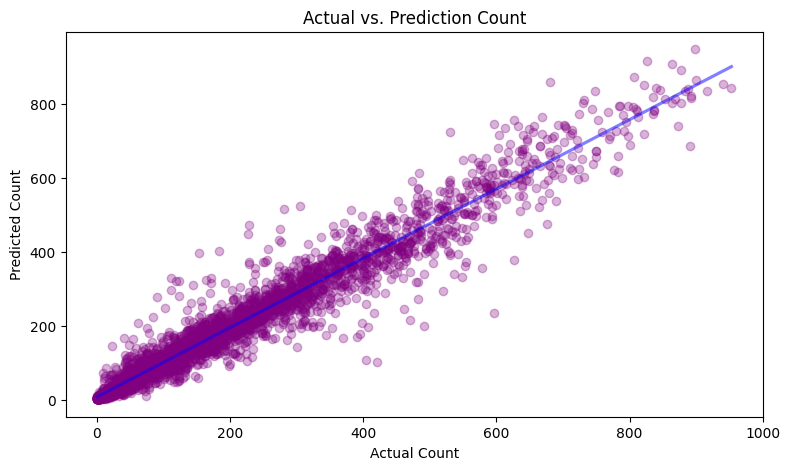

In [ ]:
plt.figure(figsize=(9, 5))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, ci=None, scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': 'blue', 'alpha': 0.5}).set(title='Actual vs. Prediction Count',
                                               xlabel='Actual Count',
                                               ylabel='Predicted Count')
plt.show()

Dari visualisasi regplot yang diberikan, terlihat bahwa model masih mampu melakukan prediksi dengan baik hingga mencapai jumlah sepeda sekitar 600 unit. Akan tetapi, langkah selanjutnya adalah mengevaluasi lebih detail dengan mengelompokkan target (jumlah penyewaan) pada data Test ke dalam rentang tertentu, dan kemudian menganalisis metrik MAE (Mean Absolute Error) dan MAPE (Mean Absolute Percentage Error) untuk setiap kelompok tersebut.

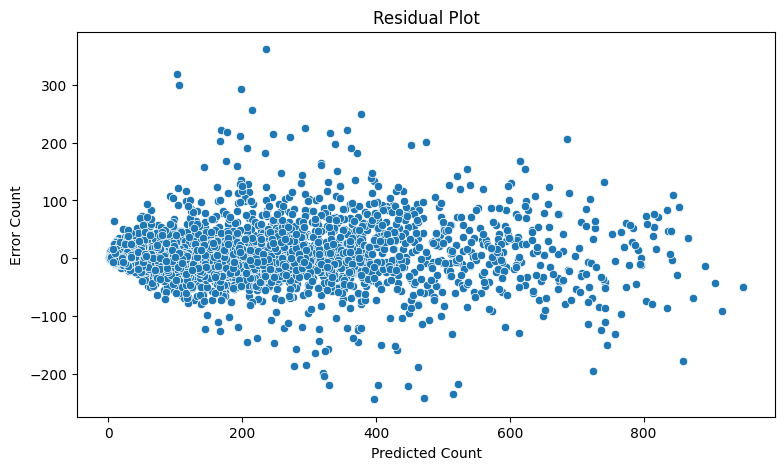

In [ ]:
residual = y_test - y_pred_xgb_tuning

plt.figure(figsize=(9, 5))
sns.scatterplot(x=y_pred_xgb_tuning, y=residual).set(title='Residual Plot', xlabel='Predicted Count', ylabel='Error Count')
plt.show()

In [ ]:
dftarget = pd.DataFrame({'Actual Count': y_test, 'Predicted Count': y_pred_xgb_tuning})

df50 = dftarget[dftarget['Actual Count'] <=50]
df100 = dftarget[(dftarget['Actual Count']>50) & (dftarget['Actual Count']<=100)]
df150 = dftarget[(dftarget['Actual Count']>100) & (dftarget['Actual Count']<=150)]
df200 = dftarget[(dftarget['Actual Count']>150) & (dftarget['Actual Count']<=200)]
df250 = dftarget[(dftarget['Actual Count']>200) & (dftarget['Actual Count']<=250)]
df300 = dftarget[(dftarget['Actual Count']>250) & (dftarget['Actual Count']<=300)]
df350 = dftarget[(dftarget['Actual Count']>300) & (dftarget['Actual Count']<=350)]
df400 = dftarget[(dftarget['Actual Count']>350) & (dftarget['Actual Count']<=400)]
df450 = dftarget[(dftarget['Actual Count']>400) & (dftarget['Actual Count']<=450)]
df500 = dftarget[(dftarget['Actual Count']>450) & (dftarget['Actual Count']<=500)]
df550 = dftarget[(dftarget['Actual Count']>500) & (dftarget['Actual Count']<=550)]
df600 = dftarget[(dftarget['Actual Count']>550) & (dftarget['Actual Count']<=600)]
df600plus = dftarget[dftarget['Actual Count']>600]

target_range = [df50, df100, df150, df200, df250, df300, df350, df400, df450, df500, df550, df600, df600plus, dftarget]
index_range = ['<=50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '>600', 'All Count Range (Max 953)']
mae = []
mape = []
for target in target_range:
    scoremae = mean_absolute_error(target['Actual Count'], target['Predicted Count'])
    scoremape = mean_absolute_percentage_error(target['Actual Count'], target['Predicted Count'])
    mae.append(scoremae)
    mape.append(scoremape)

range_metrics = pd.DataFrame({
              "Score MAE": mae,
              "Score MAPE": mape}, index=index_range)
range_metrics

,Score MAE,Score MAPE
<=50,7.131987,0.502871
51-100,18.453602,0.255349
101-150,23.727912,0.193825
151-200,26.044959,0.151437
201-250,29.457202,0.131500
251-300,30.723859,0.111833
301-350,39.700542,0.123305
351-400,43.271628,0.115724
401-450,49.671722,0.118235
451-500,62.212817,0.131262


Berdasarkan analisis pengelompokkan target, terlihat bahwa untuk target dengan jumlah unit sepeda yang disewa hingga 50 memiliki nilai MAPE yang tinggi (~50%). Meskipun pembagian data antara training (2418) dan testing (1008) sudah dilakukan dengan baik pada rentang tersebut, model tampak memiliki keterbatasan dalam memprediksi dengan akurat pada jumlah unit sepeda yang rendah.

Namun, hasil analisis menunjukkan bahwa model memiliki performa yang baik dalam memprediksi jumlah unit sepeda di atas 50. Nilai evaluasi metrik untuk rentang tersebut masih relatif baik dan masuk akal.

**Feature Importances**

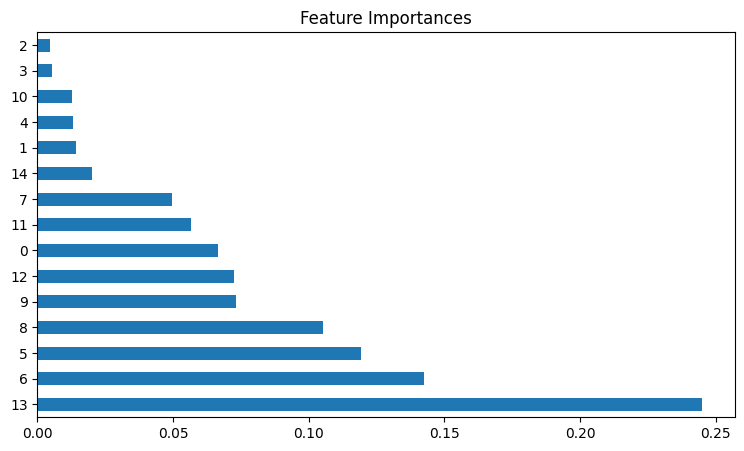

In [ ]:
# Plot feature importances
xgb_tuning = gridsearch_xgb.best_estimator_

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_).sort_values(ascending = False)
plt.figure(figsize=(9, 5))
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

### **Conclusion**

Berdasarkan hasil dari tuning hyperparameter, parameter optimal yang dapat digunakan untuk model benchmark XGBoost adalah:
- `max_depth` = 8
- `learning_rate` = 0.1
- `n_estimators` = 260

Dari analisis pemodelan yang telah dilakukan, ditemukan bahwa fitur-fitur seperti `hour`, `year`, dan `season` memiliki pengaruh yang signifikan terhadap variabel `count`.

Evaluasi model dilakukan menggunakan metrik seperti MAE, MAPE, dan R2. Hasil evaluasi menunjukkan bahwa nilai MAPE pada model setelah tuning (~25%) mengindikasikan bahwa jika model ini digunakan untuk memprediksi jumlah unit sepeda yang harus disediakan dalam rentang nilai yang telah dilatihkan (dengan jumlah maksimal 970 unit), prediksi rata-rata dapat memiliki deviasi sekitar 25% dari nilai yang seharusnya.

Namun, analisis berdasarkan kelompok target dan visualisasi sisa (residual) menunjukkan bahwa model memiliki keterbatasan dalam memprediksi jumlah unit sepeda yang rendah. Meskipun demikian, model mampu memprediksi dengan baik untuk jumlah unit sepeda di atas 50 unit, dengan hasil evaluasi metrik yang masih masuk akal. Meskipun kemungkinan prediksi yang lebih signifikan tidak dapat diabaikan. Faktor ini dipengaruhi oleh terbatasnya fitur pada dataset terkait dengan variabel target (jumlah unit sepeda yang disewa) dan kurangnya representasi situasi di mana calon pelanggan memutuskan untuk menggunakan layanan peminjaman sepeda, seperti lokasi stasiun sepeda, jarak stasiun sepeda dengan perkantoran/sekolah/ruang publik, dan lain sebagainya.

### **Recommendation**

Berikut beberapa langkah yang dapat diambil untuk mengembangkan model agar dapat menjadi lebih baik:

1. **Penambahan Fitur yang Relevan**: Memperkaya dataset dengan menambahkan fitur-fitur yang lebih berkorelasi dengan target (`count`), seperti informasi lokasi stasiun sepeda dan jarak antara stasiun sepeda dengan perkantoran, sekolah, atau area umum. Fitur-fitur ini dapat memberikan pandangan yang lebih komprehensif terhadap faktor-faktor yang memengaruhi jumlah penyewaan sepeda.

2. **Penambahan Data**: Memperluas rentang waktu dataset dengan menambahkan data dari tahun-tahun berikutnya. Dengan lebih banyak data, model dapat lebih baik dalam menangkap pola dan variasi yang terjadi dari tahun ke tahun, sehingga meningkatkan kemampuan prediksi.

3. **Pengembangan Model Lain**: Model yang telah dibuat bisa menjadi landasan untuk mengembangkan model lain dengan fokus pada prediksi tertentu, misalnya memprediksi total unit sepeda yang disewa pada lokasi tertentu. Prediksi semacam itu bisa digunakan sebagai dasar untuk mengambil keputusan bisnis, seperti menentukan penambahan stasiun sepeda di lokasi-lokasi yang strategis.

Dengan mengambil langkah-langkah tersebut, model prediksi penyewaan sepeda dapat menjadi lebih akurat dan lebih berguna dalam mendukung pengambilan keputusan dan perencanaan di bidang peminjaman sepeda.

**Pickle**

In [ ]:
X = df_model.drop('count', axis=1)
y = df_model['count']

In [ ]:
import pickle

gridsearch_xgb.best_estimator_.fit(X, y)

pickle.dump(gridsearch_xgb.best_estimator_, open('Project_Bagas.pkl', 'wb')) ## Ganti Nama File

In [ ]:
filename = 'Project_Bagas.pkl'  ## Ganti Nama File
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
print(mean_absolute_error(y_test, loaded_model.predict(X_test)))

11.68004560058306
